In [ ]:
import pandas as pd

datos = pd.read_csv("housing.csv")


In [ ]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

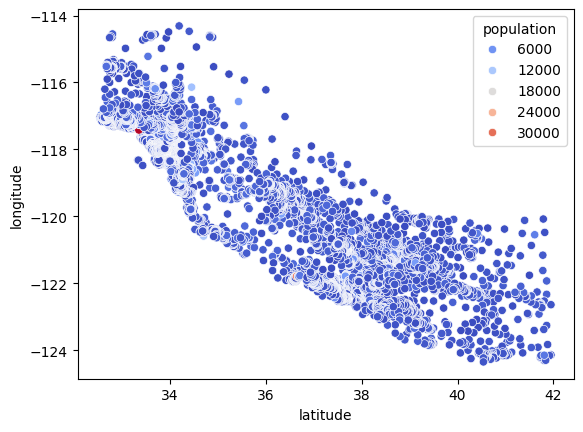

In [ ]:
import seaborn as sb
sb.scatterplot (x="latitude", y="longitude" , data=datos, hue="population",
palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

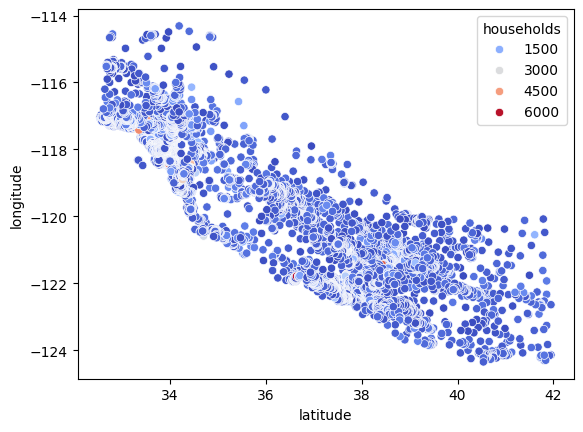

In [ ]:
import seaborn as sb
sb.scatterplot (x="latitude", y="longitude" , data=datos, hue="households",
palette="coolwarm")

In [ ]:
#CREAR UN DATO PARA EL CONJUNTO POP_PER_HOUSEHOLD(POBLACION POR CASA)
datos["pop_per_household"] = datos["population"]/datos["households"]

In [ ]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,pop_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.181467


<Axes: xlabel='latitude', ylabel='longitude'>

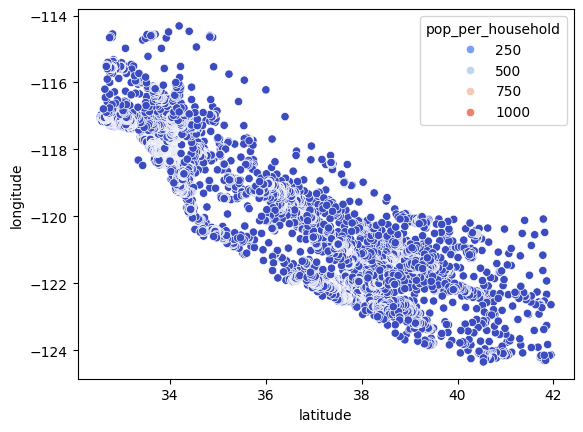

In [ ]:
import seaborn as sb
sb.scatterplot (x="latitude", y="longitude" , data=datos, hue="pop_per_household",
palette="coolwarm")

In [ ]:
#Entrenar los Cluster
from sklearn.cluster import KMeans

x = datos.loc[:, ["latitude","longitude","pop_per_household"]]
modeelo = KMeans(n_clusters=5)
predicciones = modeelo.fit_predict(x)

In [ ]:
predicciones.shape

(20640,)

In [ ]:
x["persona_casa"]= predicciones

In [ ]:
x

,latitude,longitude,pop_per_household
0,37.88,-122.23,3
1,37.86,-122.22,3
2,37.85,-122.24,3
3,37.85,-122.25,3
4,37.85,-122.25,3
...,...,...,...
20635,39.48,-121.09,3
20636,39.49,-121.21,3
20637,39.43,-121.22,3
20638,39.43,-121.32,3


In [ ]:
x["persona_casa"].value_counts()

,count
persona_casa,
0,11962
3,8674
1,2
4,1
2,1


<Axes: xlabel='latitude', ylabel='longitude'>

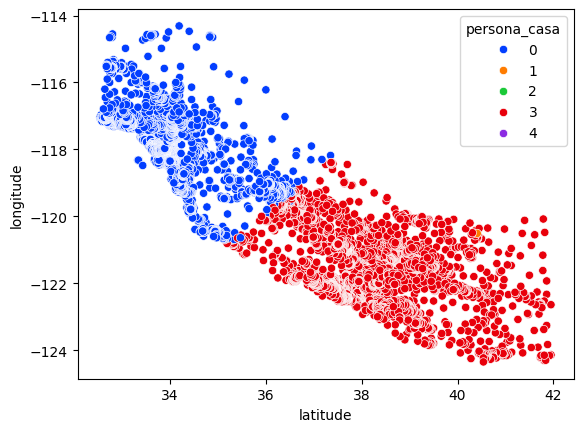

In [ ]:
import seaborn as sb
sb.scatterplot (x="latitude", y="longitude", data=x, hue="persona_casa",
palette="bright")

<ipython-input-47-e9d2cc10853d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x="persona_casa", data=x,


<Axes: xlabel='persona_casa', ylabel='count'>

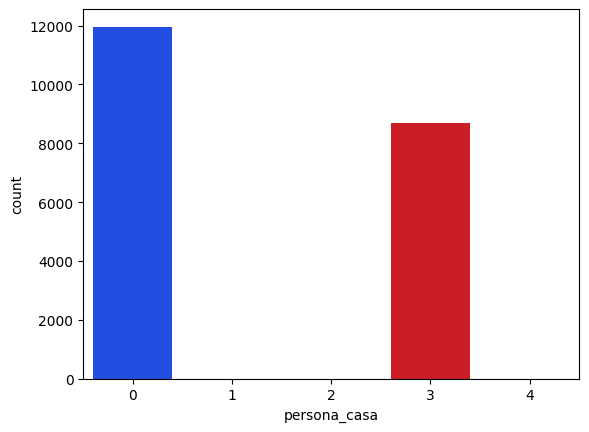

In [ ]:
sb.countplot(x="persona_casa", data=x,
             palette="bright")

In [57]:
x.groupby(["persona_casa"])["pop_per_household"].mean()

,pop_per_household
persona_casa,
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0


In [58]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,pop_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1243.333333
